In [25]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp
plt.style.use(['science','notebook'])

In [26]:
x = np.linspace(0.7,3,100)
f = 1/x

In [27]:
def test(m=100000, val=np.e):
    x2 = np.random.rand(m)
    y2 = np.random.rand(m)
    #len(x2)

    w = val-1
    x3 = [w*x+1 for i,(x,y) in enumerate(zip(x2,y2)) if y>1/(w*x+1)]
    y3 = [y for i,(x,y) in enumerate(zip(x2,y2)) if y>1/(w*x+1)]
    x4 = [w*x+1 for i,(x,y) in enumerate(zip(x2,y2)) if y<1/(w*x+1)]
    y4 = [y for i,(x,y) in enumerate(zip(x2,y2)) if y<1/(w*x+1)]
    
    return m,x,x3,y3,x4,y4,w

In [28]:
%%timeit -r 1 -n 1
val = 2.9
w = val-1
m,x,x3,y3,x4,y4,w = test()
m,x4

290 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [29]:
val = 2.9
m,x,x3,y3,x4,y4,w = test(val=val)
m,len(x4)

(100000, 56135)

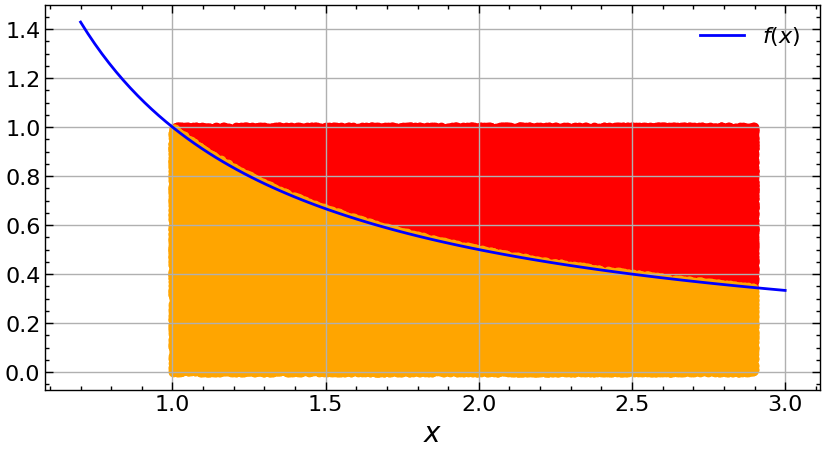

In [30]:
# plot
plt.figure(figsize=(10,5))
plt.plot(x, f, 'blue',label=r'$f(x)$')
plt.scatter(x3,y3,c='red')
plt.scatter(x4,y4,c='orange')

plt.grid()
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.show()

In [31]:
u = len(x3)/m
d = len(x4)/m  # percentage of dots under the curve
# w : total area
# area under the curve : d*w

m,d,d*w,1-d*w

(100000, 0.56135, 1.066565, -0.06656499999999999)

In [32]:
val = 2.8
error=1
while error>10e-5:
    m,x,x3,y3,x4,y4,w = test(10000,val)
    error = abs(1-d*w)
    if error < 10e-5:
        print(error)
    val -= 10e-5
    if val < np.e:break
print(val, np.e-val)

4.502499997793841e-05
2.7813999999999606 -0.06311817154091548
